In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
#Scikitlearn comes with pre-loaded dataset, load the digits 
#dataset from that collection and write a helper function to plot the image using matplotlib.
digits = datasets.load_digits()


In [60]:
def plot_image(number, string) :
    fig, ax = plt.subplots()
    ax.matshow(digits.images[number])
    ax.set_title(string)
    #plt.gray()
    #plt.matshow(digits.images[number]) 
    #plt.show() 

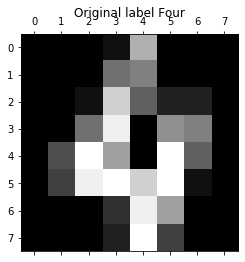

In [62]:
plot_image(4, 'Original label Four')
plt.show()

In [16]:
#Make a train -test split with 20% of the data set aside for testing. 
#Fit a logistic regression model and observe the accuracy.
from sklearn.model_selection import train_test_split
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [17]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
ln_model = LogisticRegression()
ln_model.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predicted_data = ln_model.predict(X_test)

In [21]:
from sklearn import metrics

In [22]:
metrics.accuracy_score(predicted_data, y_test)

0.8972222222222223

In [23]:
#Using scikitlearn perform a PCA transformation such that the transformed dataset can explain 95% of the variance 
#in the original dataset.
#Find out the number of components in the projected subspace.[Hint:Refer to decomposition module of scikit learn

from sklearn.decomposition import PCA

In [24]:
# Make an instance of the Model having 95 % variance
pca = PCA(.95)

In [25]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [27]:
# number of components in the projected subspace
pca.n_components_

29

In [28]:
#Transform the dataset and fit a logistic regression and observe the accuracy. 
#Compare it with the previous model andcomment on the accuracy.
#[Hint: Project both the train and test samples to the new subspace]
ln_model_opt = LogisticRegression()
ln_model_opt.fit(X_train, y_train)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predicted_data_opt = ln_model_opt.predict(X_test)
metrics.accuracy_score(predicted_data_opt, y_test)

0.8888888888888888

In [30]:
cm = metrics.confusion_matrix(y_test, predicted_data_opt)
print(cm)

[[33  0  0  0  0  0  2  0  0  0]
 [ 0 27  0  1  0  0  0  0  1  7]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  2  1 25  0  3  0  3  3  0]
 [ 0  1  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  1  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 34  1  0]
 [ 0  2  0  0  0  2  1  0 28  0]
 [ 1  3  0  1  0  0  0  0  1 31]]


In [31]:
cm = metrics.confusion_matrix(predicted_data_opt, y_test)
print(cm)

[[33  0  0  0  0  0  0  0  0  1]
 [ 0 27  0  2  1  0  0  0  2  3]
 [ 0  0 35  1  0  0  1  0  0  0]
 [ 0  1  0 25  0  0  0  0  0  1]
 [ 0  0  0  0 34  0  0  1  0  0]
 [ 0  0  0  3  0 37  0  0  2  0]
 [ 2  0  0  0  0  0 36  0  1  0]
 [ 0  0  0  3  0  0  0 34  0  0]
 [ 0  1  0  3  1  0  0  1 28  1]
 [ 0  7  0  0  1  0  0  0  0 31]]


In [54]:
#count of wrong samples
cnt=1
for i in range(10):
    for j in range (10):
        #print(cm[i][j])
        if (i!=j) & (cm[i][j]!=0):
            for k in range(cm[i][j]):
                cnt=cnt+1
print(cnt)

hi
41


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


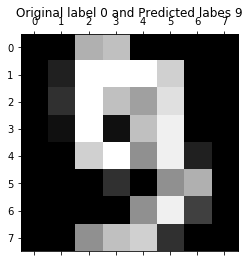

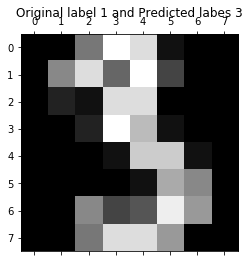

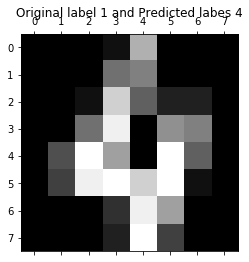

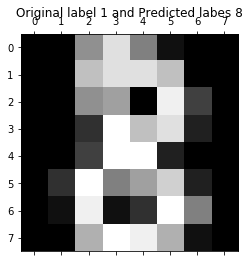

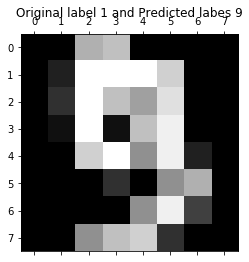

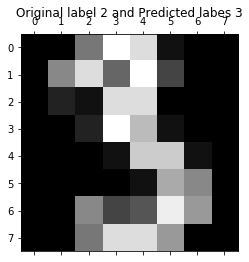

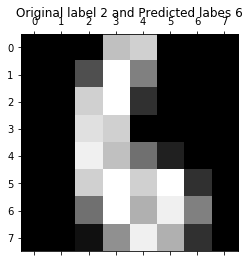

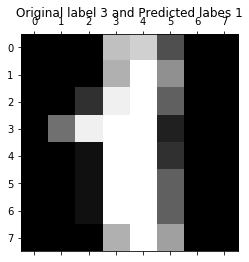

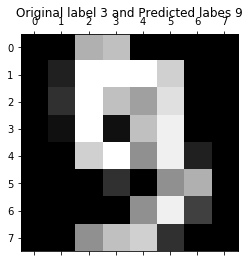

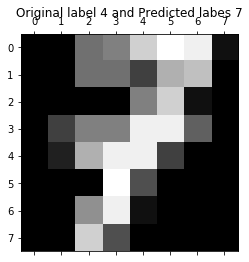

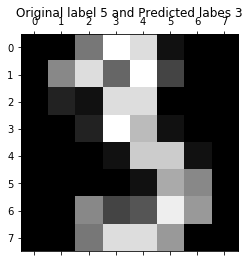

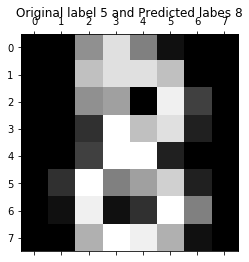

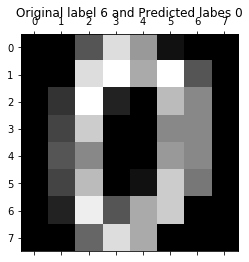

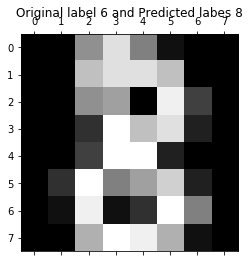

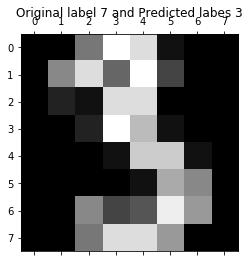

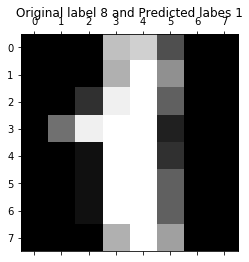

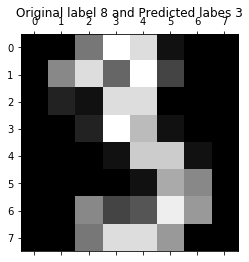

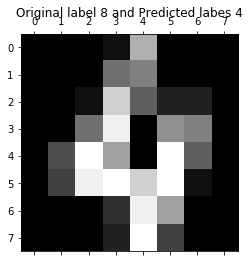

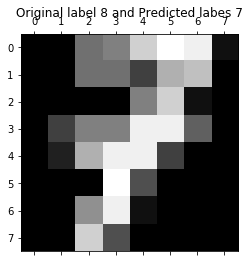

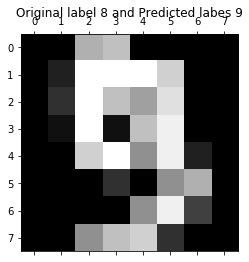

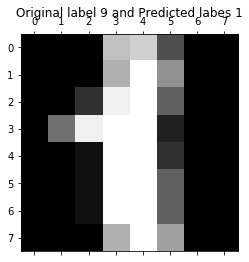

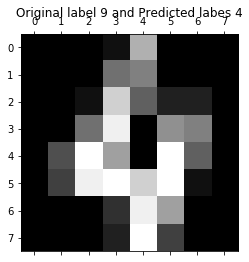

In [70]:
#plt.figure()
for i in range(10):
    for j in range (10):
        if (i!=j) & (cm[i][j]!=0):
            str1="Original label %s and Predicted labes %s" %(i,j)
            plot_image(j,str1)
           
            
        

<Figure size 432x288 with 0 Axes>

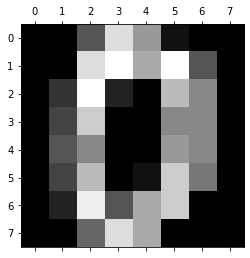

<Figure size 432x288 with 0 Axes>

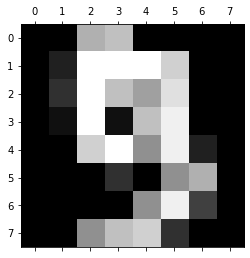

<Figure size 432x288 with 0 Axes>

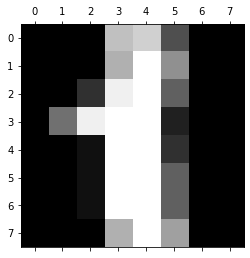

<Figure size 432x288 with 0 Axes>

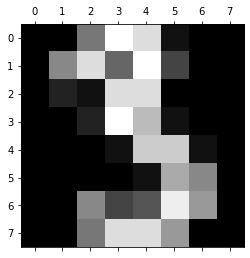

<Figure size 432x288 with 0 Axes>

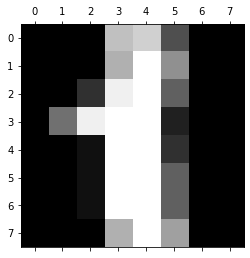

<Figure size 432x288 with 0 Axes>

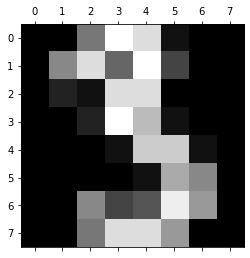

<Figure size 432x288 with 0 Axes>

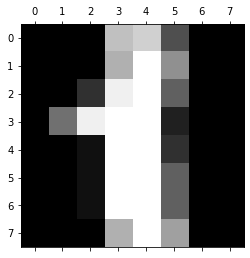

<Figure size 432x288 with 0 Axes>

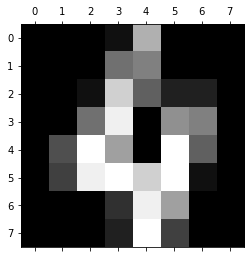

<Figure size 432x288 with 0 Axes>

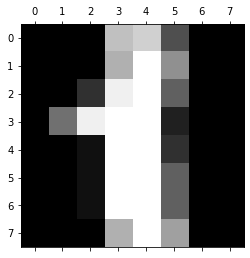

<Figure size 432x288 with 0 Axes>

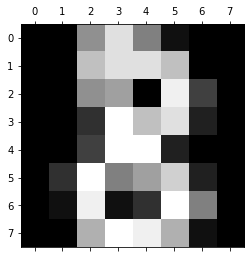

<Figure size 432x288 with 0 Axes>

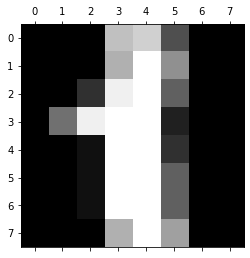

<Figure size 432x288 with 0 Axes>

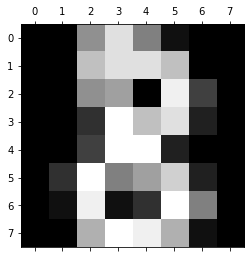

<Figure size 432x288 with 0 Axes>

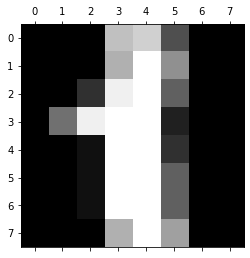

<Figure size 432x288 with 0 Axes>

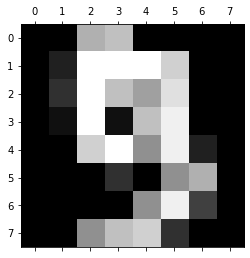

<Figure size 432x288 with 0 Axes>

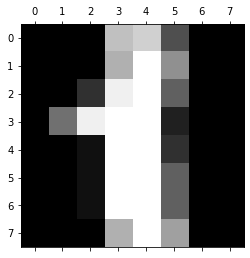

<Figure size 432x288 with 0 Axes>

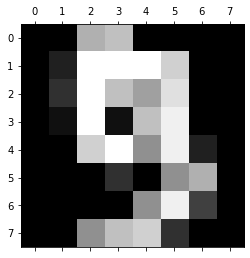

<Figure size 432x288 with 0 Axes>

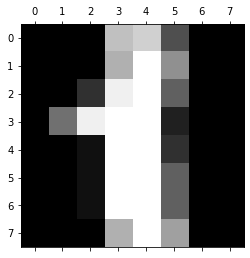

<Figure size 432x288 with 0 Axes>

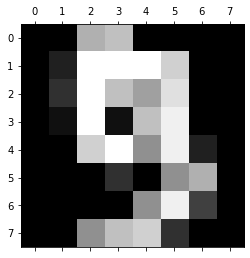

<Figure size 432x288 with 0 Axes>

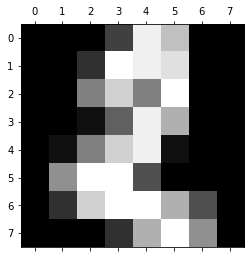

<Figure size 432x288 with 0 Axes>

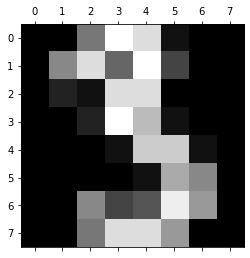

<Figure size 432x288 with 0 Axes>

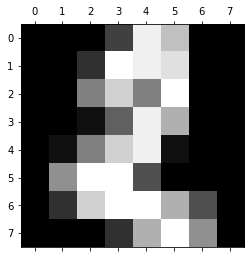

<Figure size 432x288 with 0 Axes>

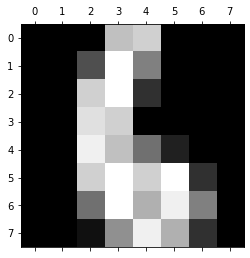

<Figure size 432x288 with 0 Axes>

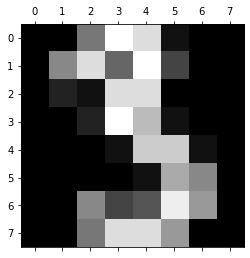

<Figure size 432x288 with 0 Axes>

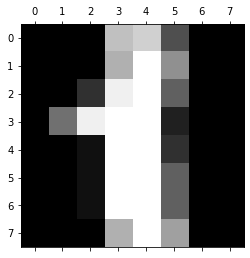

<Figure size 432x288 with 0 Axes>

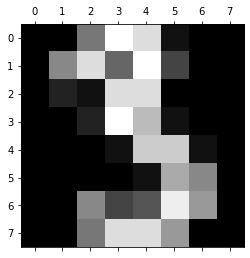

<Figure size 432x288 with 0 Axes>

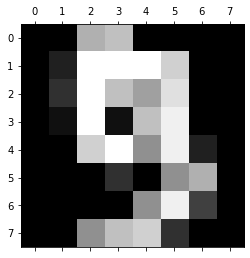

<Figure size 432x288 with 0 Axes>

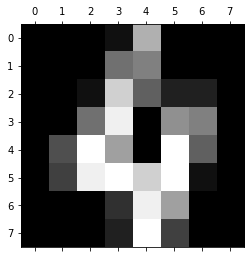

<Figure size 432x288 with 0 Axes>

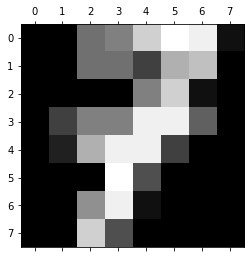

<Figure size 432x288 with 0 Axes>

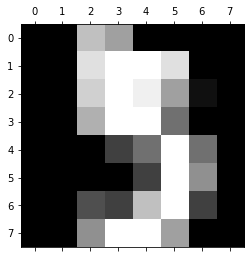

<Figure size 432x288 with 0 Axes>

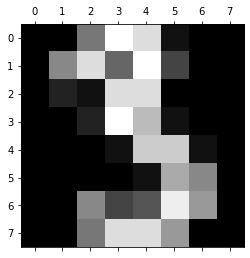

<Figure size 432x288 with 0 Axes>

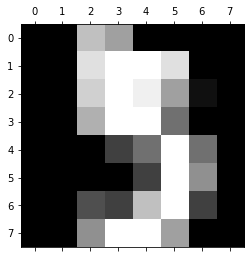

<Figure size 432x288 with 0 Axes>

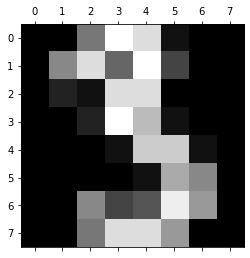

<Figure size 432x288 with 0 Axes>

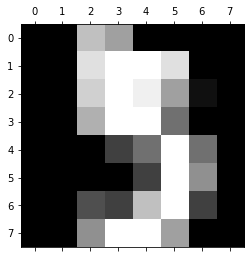

<Figure size 432x288 with 0 Axes>

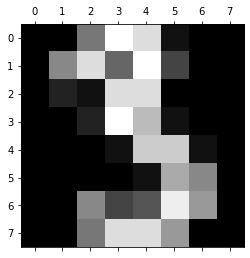

<Figure size 432x288 with 0 Axes>

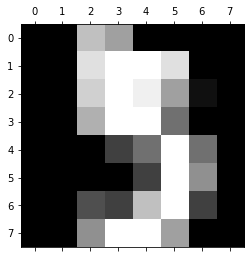

<Figure size 432x288 with 0 Axes>

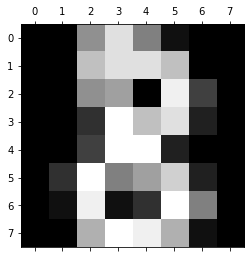

<Figure size 432x288 with 0 Axes>

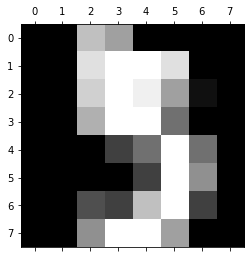

<Figure size 432x288 with 0 Axes>

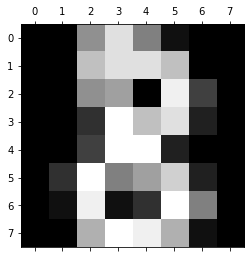

<Figure size 432x288 with 0 Axes>

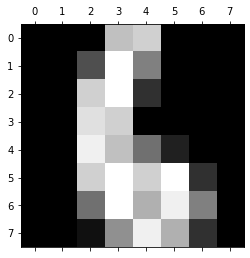

<Figure size 432x288 with 0 Axes>

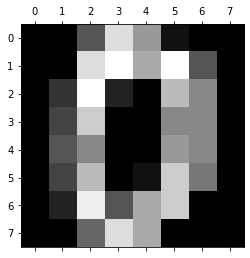

<Figure size 432x288 with 0 Axes>

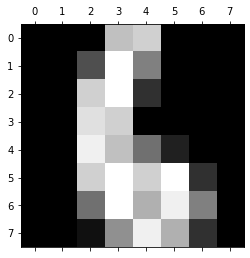

<Figure size 432x288 with 0 Axes>

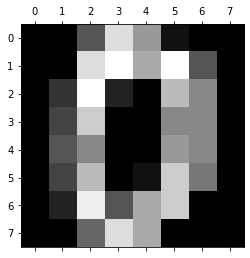

<Figure size 432x288 with 0 Axes>

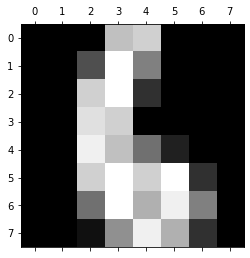

<Figure size 432x288 with 0 Axes>

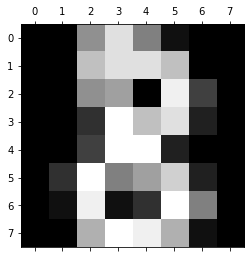

<Figure size 432x288 with 0 Axes>

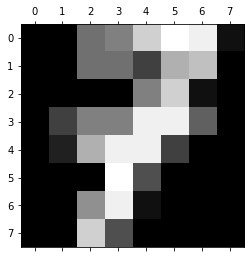

<Figure size 432x288 with 0 Axes>

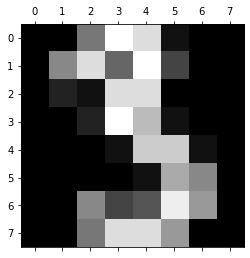

<Figure size 432x288 with 0 Axes>

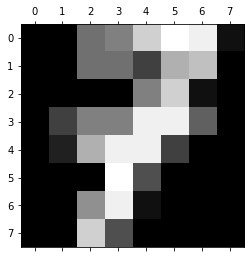

<Figure size 432x288 with 0 Axes>

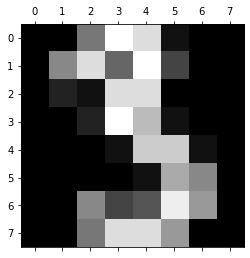

<Figure size 432x288 with 0 Axes>

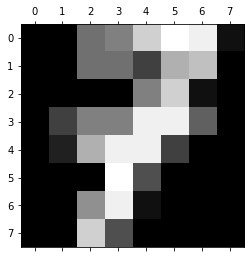

<Figure size 432x288 with 0 Axes>

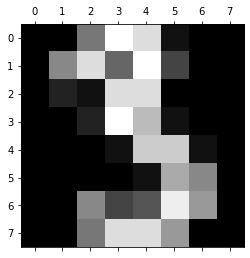

<Figure size 432x288 with 0 Axes>

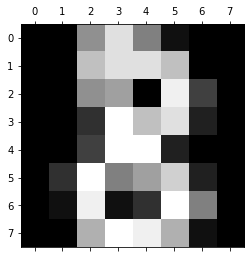

<Figure size 432x288 with 0 Axes>

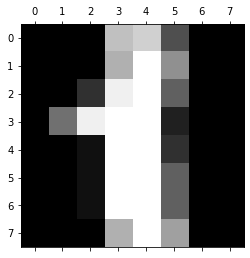

<Figure size 432x288 with 0 Axes>

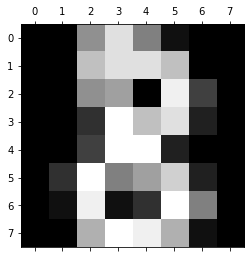

<Figure size 432x288 with 0 Axes>

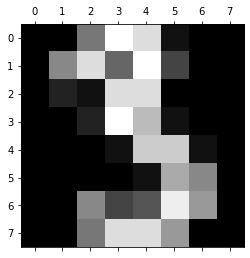

<Figure size 432x288 with 0 Axes>

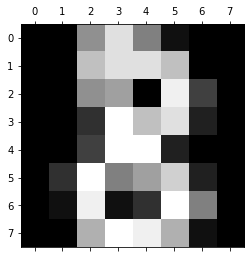

<Figure size 432x288 with 0 Axes>

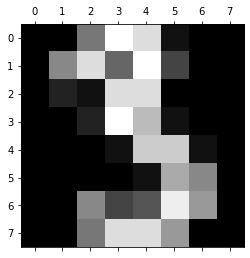

<Figure size 432x288 with 0 Axes>

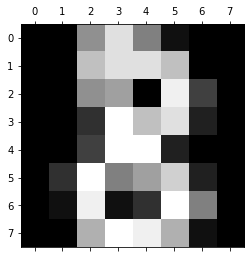

<Figure size 432x288 with 0 Axes>

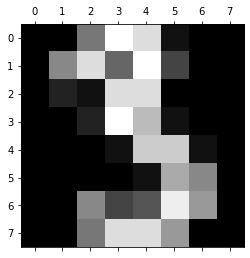

<Figure size 432x288 with 0 Axes>

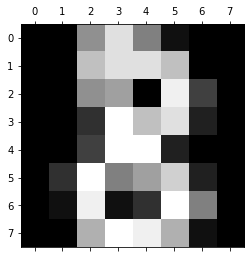

<Figure size 432x288 with 0 Axes>

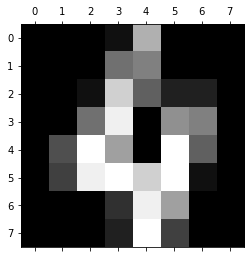

<Figure size 432x288 with 0 Axes>

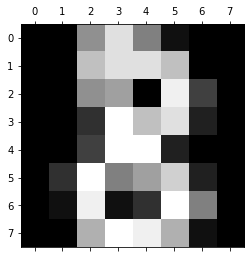

<Figure size 432x288 with 0 Axes>

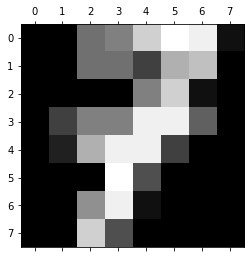

<Figure size 432x288 with 0 Axes>

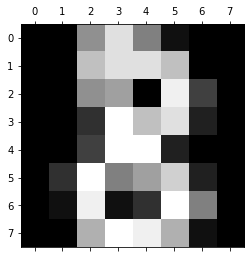

<Figure size 432x288 with 0 Axes>

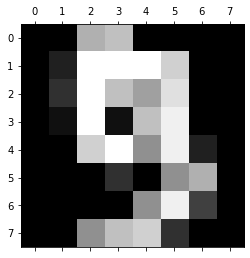

<Figure size 432x288 with 0 Axes>

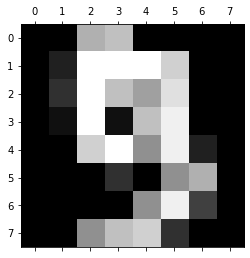

<Figure size 432x288 with 0 Axes>

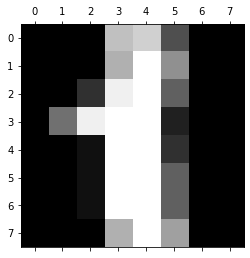

<Figure size 432x288 with 0 Axes>

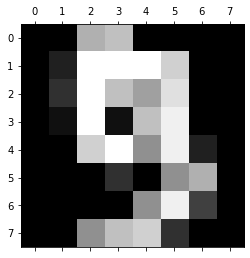

<Figure size 432x288 with 0 Axes>

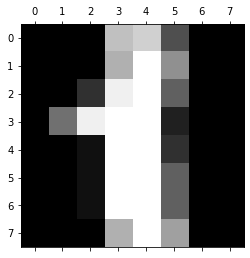

<Figure size 432x288 with 0 Axes>

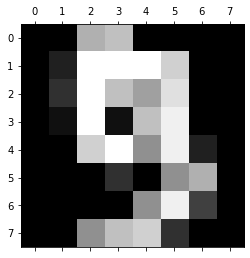

<Figure size 432x288 with 0 Axes>

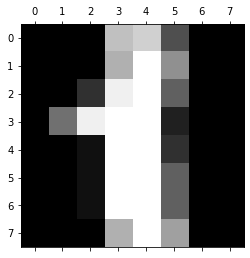

<Figure size 432x288 with 0 Axes>

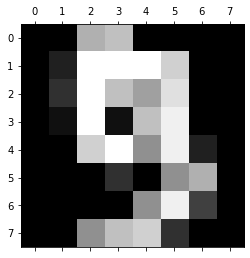

<Figure size 432x288 with 0 Axes>

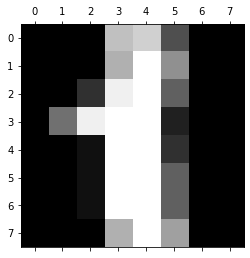

<Figure size 432x288 with 0 Axes>

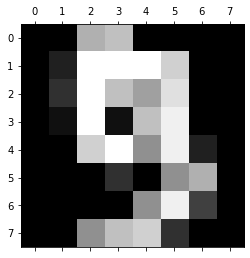

<Figure size 432x288 with 0 Axes>

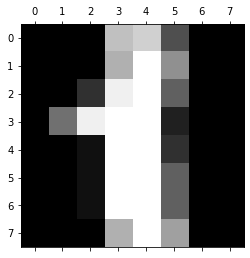

<Figure size 432x288 with 0 Axes>

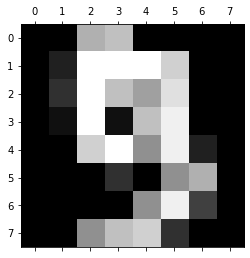

<Figure size 432x288 with 0 Axes>

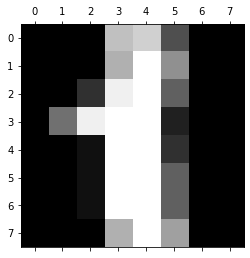

<Figure size 432x288 with 0 Axes>

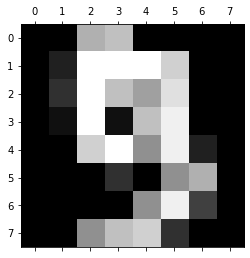

<Figure size 432x288 with 0 Axes>

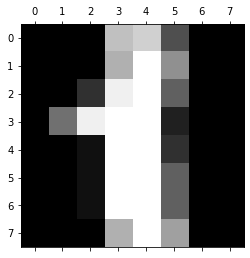

<Figure size 432x288 with 0 Axes>

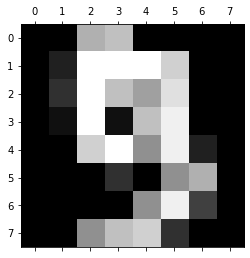

<Figure size 432x288 with 0 Axes>

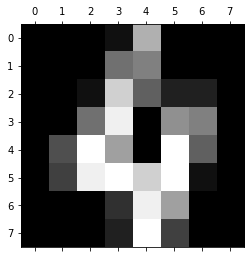

In [53]:
plt.figure()
for i in range(10):
    for j in range (10):
        #print(cm[i][j])
        if (i!=j) & (cm[i][j]!=0):
            for k in range(cm[i][j]):
                
                #plt.subplot(121)
                plot_image(i)
                #plt.subplot(122)
                plot_image(j)
plt.show() 
            
          
                